In [24]:
%pip install -q scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.chdir('../')

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

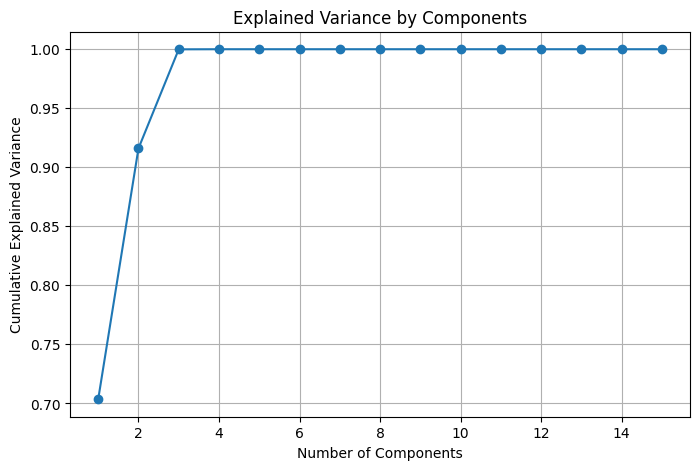

                             PC1           PC2           PC3           PC4  \
OSEBuildingID      -1.927832e-04 -7.881641e-05  4.873424e-04  1.995531e-02   
DataYear            0.000000e+00  2.775558e-17  2.775558e-16  2.982163e-14   
ZipCode            -8.639383e-08 -1.611543e-07  4.012432e-07 -1.547702e-05   
Latitude           -2.045066e-10 -1.632866e-10  2.719807e-10 -2.456188e-08   
Longitude           1.260943e-10  2.516405e-12  5.819994e-11 -1.133748e-08   
YearBuilt           3.033198e-07  1.143698e-07 -1.437302e-06  6.277696e-05   
NumberofFloors      3.307039e-07  1.709374e-07 -8.768880e-07  2.459827e-05   
NumberofBuildings   2.374985e-08  1.496275e-08  1.496272e-08 -6.916175e-08   
PropertyGFATotal    1.690465e-02  3.497862e-03 -2.271904e-02  9.993940e-01   
ENERGYSTARScore    -1.847942e-07 -5.977430e-07 -7.316062e-07  6.121763e-05   
SiteEUI(kBtu/sf)    1.663517e-06  1.983419e-06  2.037235e-06 -1.314358e-04   
SourceEUI(kBtu/sf)  3.518425e-06  2.171430e-06 -1.264624e-06 -3.

In [27]:
data = pd.read_csv('data/Seattle_Building_Data_Cleaned.csv')
data = data.drop(columns=['BuildingName', 'BuildingType', 'Address', 'Neighborhood', 'EPAPropertyType', 'ComplianceStatus', 'ComplianceIssue', 'GHGEmissionsIntensity'])
data = data.dropna()
pca = PCA()

pca.fit(data)

c_var = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(c_var) + 1), c_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

# Get the PCA components
components = pca.components_

# Create a DataFrame with component loadings
loading_df = pd.DataFrame(
    components.T,
    index=data.columns,
    columns=[f'PC{i+1}' for i in range(components.shape[0])]
)

print(loading_df)

for pc in loading_df.columns:
    top_features = loading_df[pc].abs().nlargest(5).index
    print(f'Top {5} features for {pc}: {list(top_features)}')


In [28]:
pca = PCA(n_components = 3)

pca.fit(data)

c_var = pca.explained_variance_ratio_.cumsum()

components = pca.components_

# Create a DataFrame with component loadings
loading_df = pd.DataFrame(
    components.T,
    index=data.columns,
    columns=[f'PC{i+1}' for i in range(components.shape[0])]
)

print(loading_df)

for pc in loading_df.columns:
    top_features = loading_df[pc].abs().nlargest(5).index
    print(f'Top {5} features for {pc}: {list(top_features)}')

                             PC1           PC2           PC3
OSEBuildingID      -1.927832e-04 -7.881641e-05  4.873424e-04
DataYear            0.000000e+00  2.775558e-17  2.775558e-16
ZipCode            -8.639383e-08 -1.611543e-07  4.012432e-07
Latitude           -2.045066e-10 -1.632866e-10  2.719807e-10
Longitude           1.260943e-10  2.516405e-12  5.819994e-11
YearBuilt           3.033198e-07  1.143698e-07 -1.437302e-06
NumberofFloors      3.307039e-07  1.709374e-07 -8.768880e-07
NumberofBuildings   2.374985e-08  1.496275e-08  1.496272e-08
PropertyGFATotal    1.690465e-02  3.497862e-03 -2.271904e-02
ENERGYSTARScore    -1.847942e-07 -5.977430e-07 -7.316062e-07
SiteEUI(kBtu/sf)    1.663517e-06  1.983419e-06  2.037235e-06
SourceEUI(kBtu/sf)  3.518425e-06  2.171430e-06 -1.264624e-06
SteamUse(kBtu)      4.016436e-01 -5.676313e-01  7.185709e-01
Electricity(kBtu)   8.746786e-01  5.701310e-03 -4.839818e-01
NaturalGas(kBtu)    2.708023e-01  8.232557e-01  4.988999e-01
Top 5 features for PC1: 

In [29]:
loading_df.to_csv('data/PCA.csv')